# Tutorial 1: Introduction to ``braintools.input``

Welcome to the ``braintools.input`` tutorial series! This module provides comprehensive tools for generating current inputs used in computational neuroscience simulations.

## Learning Objectives

By the end of this tutorial, you will:
- Understand what current inputs are and their role in neuroscience
- Learn the difference between Composable and Functional APIs
- Set up your environment for braintools
- Generate your first current inputs
- Create basic visualizations of current signals

## 1. What are Current Inputs?

Current inputs are electrical stimuli applied to neurons or neural models to study their behavior. They are fundamental in:

- **Electrophysiology**: Injecting current through patch pipettes
- **Optogenetics**: Light-activated current generation
- **Neural stimulation**: Deep brain stimulation, TMS, etc.
- **Computational modeling**: Simulating synaptic inputs and external stimuli

### Types of Current Inputs

- **Basic patterns**: Constant, step, ramp currents
- **Periodic waveforms**: Sine waves, square waves, chirps
- **Pulse patterns**: Spikes, bursts, synaptic-like pulses
- **Stochastic inputs**: Noise, random processes

## 2. Environment Setup

Let's start by importing the necessary libraries and setting up our environment.

In [12]:
# Essential imports
import numpy as np
import matplotlib.pyplot as plt
import brainstate
import brainunit as u
import braintools

# Set up plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 3. Two APIs Overview

braintools.input provides two complementary APIs:

### Composable API (Object-Oriented)
- **Recommended for complex protocols**
- Inputs are objects that can be combined and transformed
- Supports operations like addition, multiplication, clipping
- More flexible and powerful

### Functional API (Traditional)
- **Good for simple, direct array generation**
- Functions that directly return arrays
- Familiar to users of scipy.signal
- More straightforward for basic use cases

## 4. Setting Up the Simulation Environment

Before generating any inputs, we need to set up the temporal resolution using brainstate's environment context.

In [13]:
# Set the time step for our simulations
dt = 0.1 * u.ms  # 100 microseconds - good resolution for most applications

print(f"Time step: {dt}")
print(f"This means 1 ms contains {int(1 * u.ms / dt)} time points")

Time step: 0.1 * msecond
This means 1 ms contains 10 time points


## 5. Your First Current Inputs

Let's generate some basic current patterns using both APIs.

### 5.1 Constant Current

In [14]:
# Using Composable API
with brainstate.environ.context(dt=dt):
    # Create a constant current of 5 nA for 1 second
    constant_composable = braintools.input.Constant([(5.0, 1000 * u.ms)])
    signal_composable = constant_composable()

# Using Functional API  
with brainstate.environ.context(dt=dt):
    signal_functional = braintools.input.constant([(5.0, 1000 * u.ms)])[0]

print(f"Composable signal shape: {signal_composable.shape}")
print(f"Functional signal shape: {signal_functional.shape}")
print(f"Signals are equal: {np.allclose(u.get_magnitude(signal_composable), u.get_magnitude(signal_functional))}")

Composable signal shape: (10000,)
Functional signal shape: (10000,)
Signals are equal: True


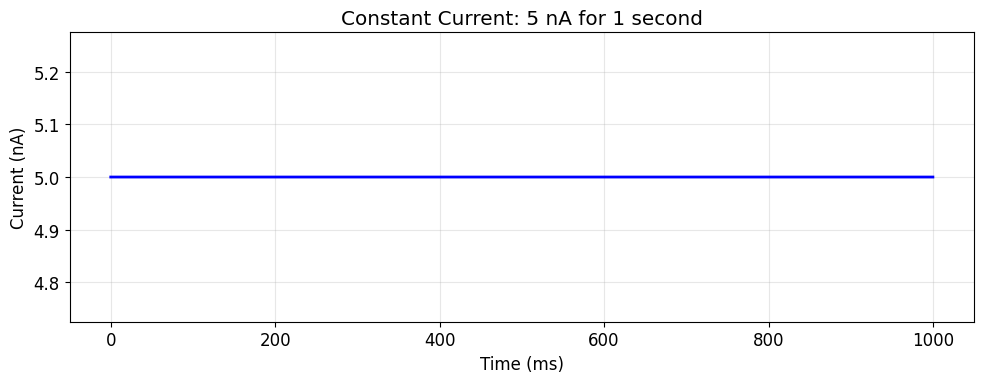

In [15]:
# Let's plot the constant current
def plot_signal(signal, duration, title, ax=None):
    """Helper function to plot current signals."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))

    # Create time axis
    dt_val = u.get_magnitude(dt)
    duration_val = u.get_magnitude(duration)
    time_points = np.arange(0, duration_val, dt_val)

    # Get signal magnitude
    signal_val = u.get_magnitude(signal)

    ax.plot(time_points, signal_val, 'b-', linewidth=2)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Current (nA)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    return ax


# Plot the constant current
plot_signal(signal_composable, 1000 * u.ms, 'Constant Current: 5 nA for 1 second')
plt.tight_layout()
plt.show()

### 5.2 Ramp Current

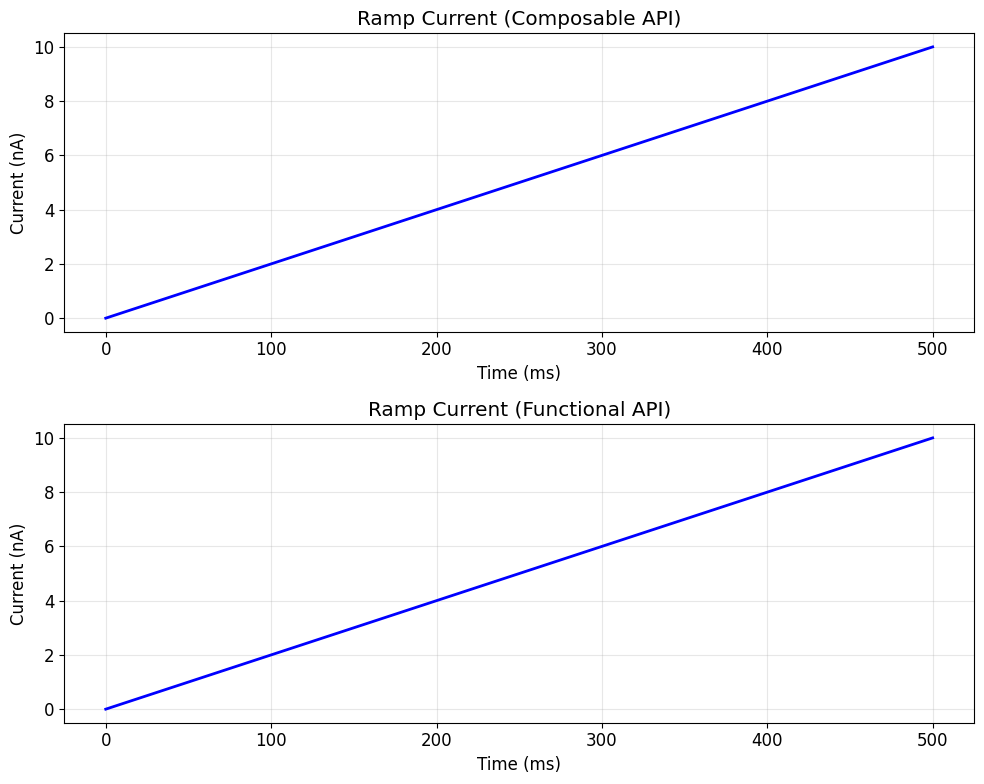

Maximum difference between APIs: 0.00e+00 nA


In [16]:
# Create a ramp from 0 to 10 nA over 500 ms
with brainstate.environ.context(dt=dt):
    # Composable API
    ramp_composable = braintools.input.Ramp(0, 10, 500 * u.ms)
    ramp_signal_comp = ramp_composable()

    # Functional API
    ramp_signal_func = braintools.input.ramp(0, 10, 500 * u.ms)

# Plot both signals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_signal(ramp_signal_comp, 500 * u.ms, 'Ramp Current (Composable API)', ax1)
plot_signal(ramp_signal_func, 500 * u.ms, 'Ramp Current (Functional API)', ax2)

plt.tight_layout()
plt.show()

print(f"Maximum difference between APIs: {np.max(np.abs(u.get_magnitude(ramp_signal_comp - ramp_signal_func))):.2e} nA")

### 5.3 Step Current

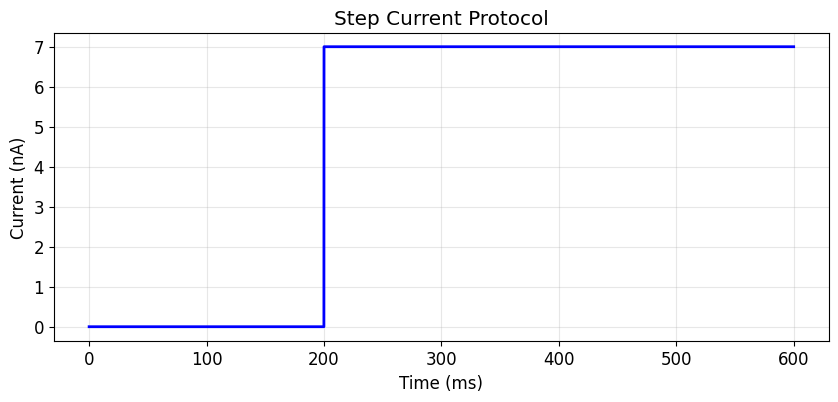

In [17]:
# Create a step current: 0 → 3 → 7 → 0 nA
with brainstate.environ.context(dt=dt):
    step_current = braintools.input.Step(
        [0, 3, 7, 0],
        [100 * u.ms, 200 * u.ms, 200 * u.ms, 100 * u.ms],
        duration=600 * u.ms
    )
    step_signal = step_current()

plot_signal(step_signal, 600 * u.ms, 'Step Current Protocol')
plt.show()

## 6. Basic Waveforms

### 6.1 Sinusoidal Current

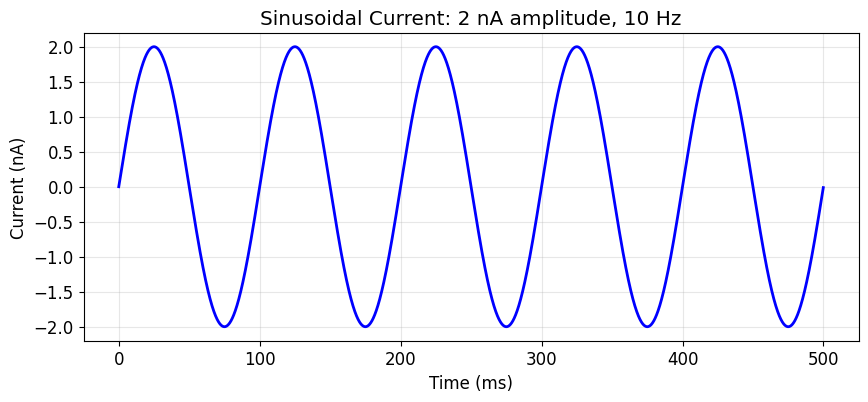

In [18]:
# Generate a 10 Hz sinusoidal current
with brainstate.environ.context(dt=dt):
    sine_current = braintools.input.Sinusoidal(amplitude=2.0, frequency=10 * u.Hz, duration=500 * u.ms)
    sine_signal = sine_current()

plot_signal(sine_signal, 500 * u.ms, 'Sinusoidal Current: 2 nA amplitude, 10 Hz')
plt.show()

### 6.2 Square Wave Current

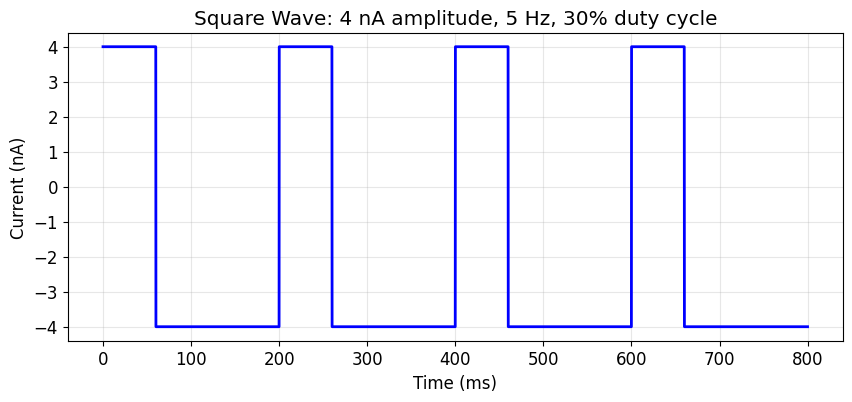

In [19]:
# Generate a 5 Hz square wave with 30% duty cycle
with brainstate.environ.context(dt=dt):
    square_current = braintools.input.Square(amplitude=4.0, frequency=5 * u.Hz, duration=800 * u.ms, duty_cycle=0.3)
    square_signal = square_current()

plot_signal(square_signal, 800 * u.ms, 'Square Wave: 4 nA amplitude, 5 Hz, 30% duty cycle')
plt.show()

## 7. Understanding Parameters and Units

braintools.input uses brainunit for proper unit handling. This ensures dimensional consistency and prevents common errors.

In [20]:
# Examples of different units
print("Time units:")
print(f"1 second = {1 * u.second}")
print(f"500 milliseconds = {500 * u.ms}")
print(f"100 microseconds = {100 * u.us}")

print("\nCurrent units:")
print(f"1 nanoamp = {1 * u.nA}")
print(f"1 picoamp = {1 * u.pA}")
print(f"0.5 microamp = {0.5 * u.uA}")

print("\nFrequency units:")
print(f"10 Hz = {10 * u.Hz}")
print(f"1 kHz = {1 * u.kHz}")

Time units:
1 second = 1 * second
500 milliseconds = 500 * msecond
100 microseconds = 100 * usecond

Current units:
1 nanoamp = 1 * namp
1 picoamp = 1 * pamp
0.5 microamp = 0.5 * uamp

Frequency units:
10 Hz = 10 * hertz
1 kHz = 1 * khertz


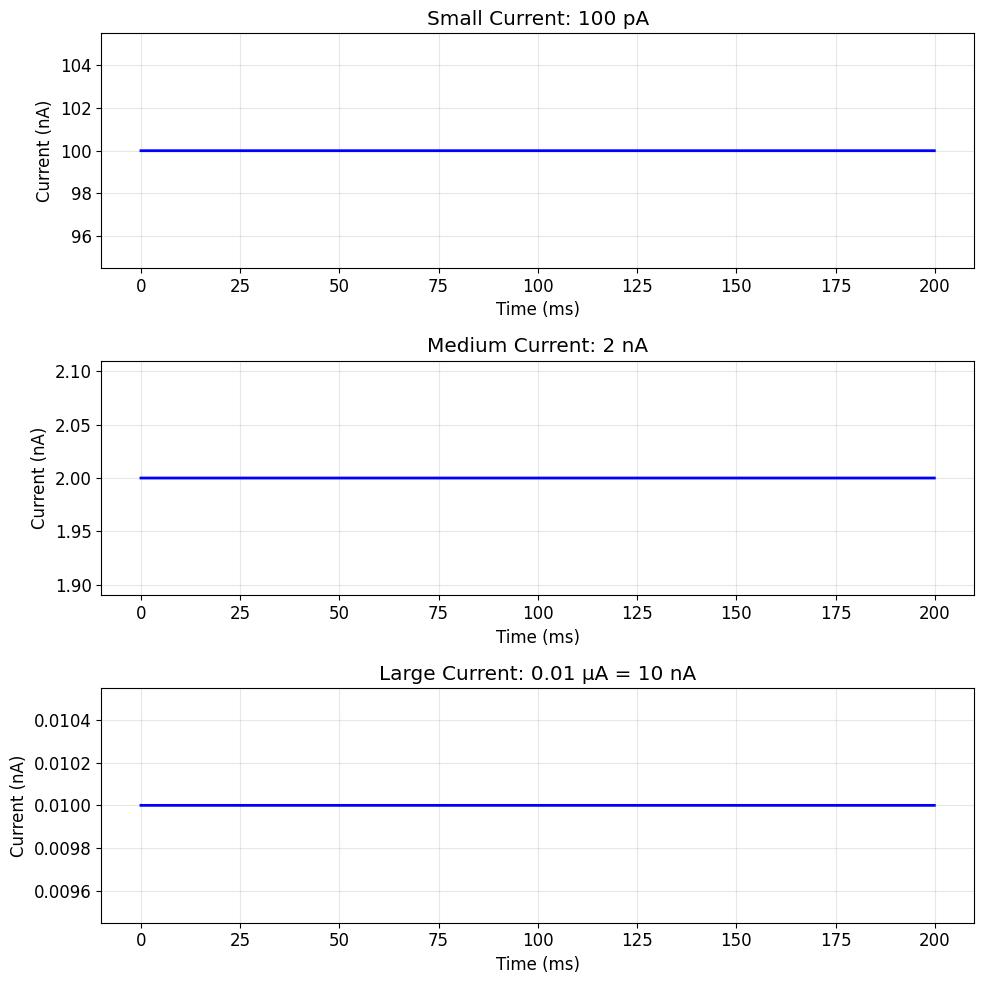

All currents in nA: 100.000, 2.000, 0.010


In [21]:
# Example: Creating currents with different amplitudes and units
with brainstate.environ.context(dt=dt):
    # Small current in picoamps
    small_current = braintools.input.Constant([(100 * u.pA, 200 * u.ms)])
    small_signal = small_current()

    # Medium current in nanoamps
    medium_current = braintools.input.Constant([(2 * u.nA, 200 * u.ms)])
    medium_signal = medium_current()

    # Large current in microamps
    large_current = braintools.input.Constant([(0.01 * u.uA, 200 * u.ms)])
    large_signal = large_current()

# Plot all three
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

plot_signal(small_signal, 200 * u.ms, 'Small Current: 100 pA', axes[0])
plot_signal(medium_signal, 200 * u.ms, 'Medium Current: 2 nA', axes[1])
plot_signal(large_signal, 200 * u.ms, 'Large Current: 0.01 μA = 10 nA', axes[2])

plt.tight_layout()
plt.show()

print(
    f"All currents in nA: {u.get_magnitude(small_signal[0]):.3f}, {u.get_magnitude(medium_signal[0]):.3f}, {u.get_magnitude(large_signal[0]):.3f}")

## 9. Key Concepts Summary

### What we learned:

1. **Current inputs** are fundamental tools in neuroscience for stimulating neurons and neural circuits

2. **Two APIs available**:
   - **Composable API**: Object-oriented, more powerful for complex protocols
   - **Functional API**: Simple function calls, good for basic use

3. **Essential setup**:
   - Always use `brainstate.environ.context(dt=...)` to set temporal resolution
   - Use `brainunit` for proper unit handling

4. **Basic input types**:
   - `Constant`: Sustained current levels
   - `Step`: Instantaneous current changes
   - `Ramp`: Linear current transitions
   - `Section`: Multi-phase protocols
   - `Sinusoidal`: Rhythmic oscillations
   - `Square`: Pulse-like patterns

5. **Units matter**: Always specify proper units (nA, ms, Hz) to avoid errors

## 10. Practice Exercises

Try these exercises to reinforce your learning:

In [22]:
# Exercise 1: Create a 2-second constant current of 3 nA
# Your code here:

with brainstate.environ.context(dt=dt):
    # TODO: Create constant current
    pass

# Uncomment to test:
# plot_signal(your_signal, 2000*u.ms, 'Exercise 1: 3 nA constant current')
# plt.show()

In [23]:
# Exercise 2: Create a ramp from -5 to 5 nA over 500 ms
# Your code here:

with brainstate.environ.context(dt=dt):
    # TODO: Create ramp
    pass

# Uncomment to test:
# plot_signal(your_ramp, 500*u.ms, 'Exercise 2: -5 to 5 nA ramp')
# plt.show()

In [24]:
# Exercise 3: Create a 20 Hz sinusoidal current with 1.5 nA amplitude for 300 ms
# Your code here:

with brainstate.environ.context(dt=dt):
    # TODO: Create sinusoidal current
    pass

# Uncomment to test:
# plot_signal(your_sine, 300*u.ms, 'Exercise 3: 20 Hz sinusoid')
# plt.show()

## Solutions (Run after attempting exercises)

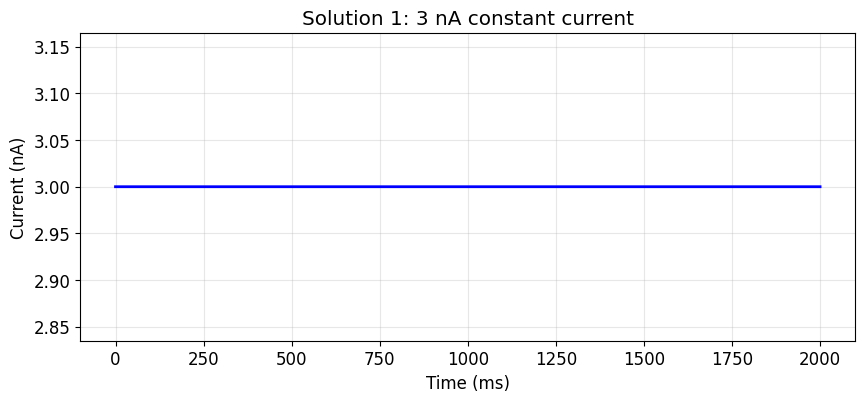

In [25]:
# Solution 1
with brainstate.environ.context(dt=dt):
    ex1_current = braintools.input.Constant([(3.0, 2000 * u.ms)])
    ex1_signal = ex1_current()

plot_signal(ex1_signal, 2000 * u.ms, 'Solution 1: 3 nA constant current')
plt.show()

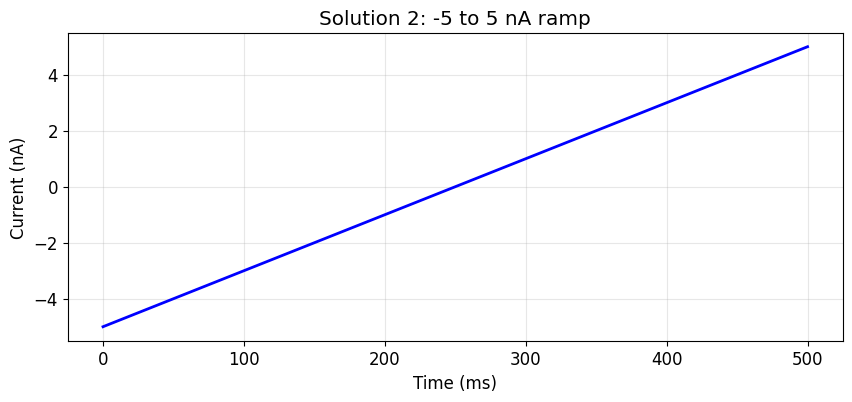

In [26]:
# Solution 2
with brainstate.environ.context(dt=dt):
    ex2_ramp = braintools.input.Ramp(-5, 5, 500 * u.ms)
    ex2_signal = ex2_ramp()

plot_signal(ex2_signal, 500 * u.ms, 'Solution 2: -5 to 5 nA ramp')
plt.show()

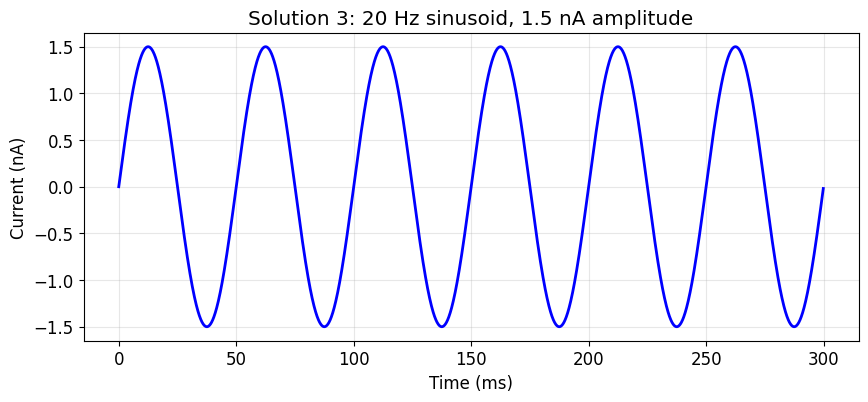

In [27]:
# Solution 3
with brainstate.environ.context(dt=dt):
    ex3_sine = braintools.input.Sinusoidal(1.5, 20 * u.Hz, 300 * u.ms)
    ex3_signal = ex3_sine()

plot_signal(ex3_signal, 300 * u.ms, 'Solution 3: 20 Hz sinusoid, 1.5 nA amplitude')
plt.show()

## Next Steps

Now that you understand the basics, you can move on to:

- **Tutorial 2: Functional APIs** - Deep dive into the functional approach with all input types
- **Tutorial 3: Composable APIs** - Learn to combine and transform inputs for complex protocols  
- **Tutorial 4: Custom Transformations and Pipelines** - Advanced techniques for real-world applications

Great job completing your first ``braintools.input`` tutorial! 🎉